In [1]:
import os
import sys
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

project_root = os.path.abspath(os.path.join(os.path.dirname("__file__"), "../src"))
sys.path.insert(0, project_root)

import gf_selection

In [2]:
pdcs = 0.02  # accepted rate of decompression sickness (DCS)
he_percentage = 0
o2_percentage = 21

In [3]:
T_values = np.linspace(30, 180, 20)
D_values = np.linspace(20, 60, 40)
# o2_values = np.linspace(18, 36, 5)
o2_values = [21]
pdcs_values = [0.01, 0.02, 0.03, 0.05]

combinations = [
    (T, D, o2, pdcs) 
    for T in T_values
    for D in D_values
    for o2 in o2_values
    for pdcs in pdcs_values
]
df = pd.DataFrame(combinations, columns=['T', 'D', 'o2', 'pdcs'])

In [4]:
df['prt'] = df['D']/10+1 * np.sqrt(df['T'])
df['TDT'] = df.apply(lambda x: gf_selection.get_standair_tdt(x['D'], x['T'], x['pdcs']), axis=1)
df['prt'] = (df['D']/10+1) * np.sqrt(df['T'])

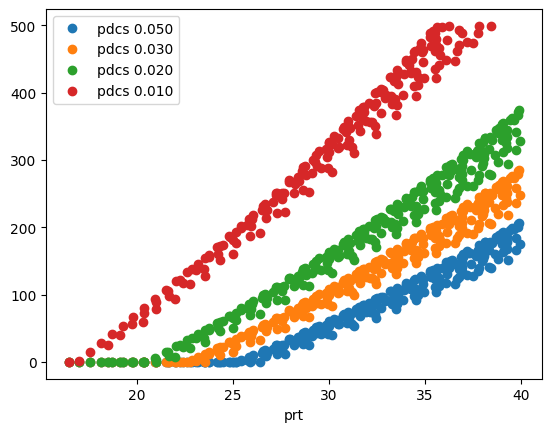

In [5]:
# Filter out unnecessary long dives to speed up calculations.
df = df[
    (df['TDT'] < 500)
    & (df['prt'] < 40)
].copy()

ax = plt.gca()
for pdcs, data in sorted(df.groupby('pdcs'), key=lambda x: x[0], reverse=True):
    data.plot('prt', 'TDT', marker="o", linewidth=0, label=f"pdcs {pdcs:.3f}", ax=ax)

In [6]:
df = gf_selection.parallelize_dataframe(df, gf_selection.fit_gf_to_tdt_df)

Text(0, 0.5, 'GF high')

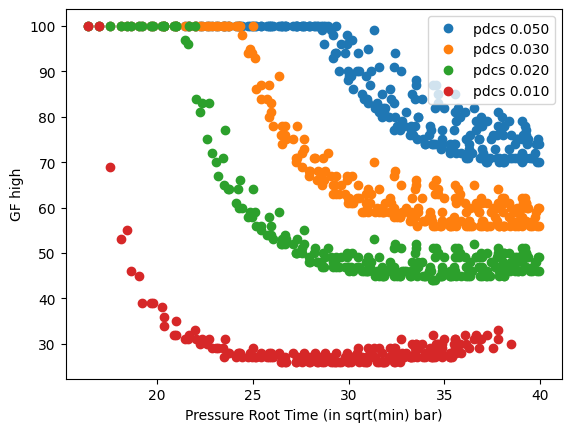

In [7]:
ax = plt.gca()
for pdcs, data in sorted(df.groupby('pdcs'), key=lambda x: x[0], reverse=True):
    data[data['prt'] < 40].plot('prt', 'gf_high', marker="o", linewidth=0, label=f"pdcs {pdcs:.3f}", ax=ax)
plt.legend(loc='upper right')
plt.xlabel('Pressure Root Time (in sqrt(min) bar)')
plt.ylabel('GF high')

# Graph should be similar as in Fraedrich, Doug. "Evidence-Based Study on the Setting of High Gradient Factor." (2024).

In [8]:
# TODO:
# Appropriate settings for GF-Hi needed for higher PrT levels found in decompression diving was
# estimated using a second model, the Tissue Bubble Dynamics Model, TBDM mentioned in Table 1 above
# [Ref 12].
# 12. Gernhardt, M. “Development and evaluation of a decompression stress index based on
# tissue bubble dynamics.” Ph.D. dissertation, University of Pennsylvania, 1991

# These results are consistent with recent findings of Doolette [Ref 14.]
# 14. Doolette, D., “Advances in Decompression Theory and Practice” Rebreather Forum 4, 2023
# https://gue.tv/programs/decompression-theory-ccr-diving-rebreather-safe-practices